In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [3]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [4]:
# Normalize the data
x_train = X_train / 255
x_test = X_test / 255

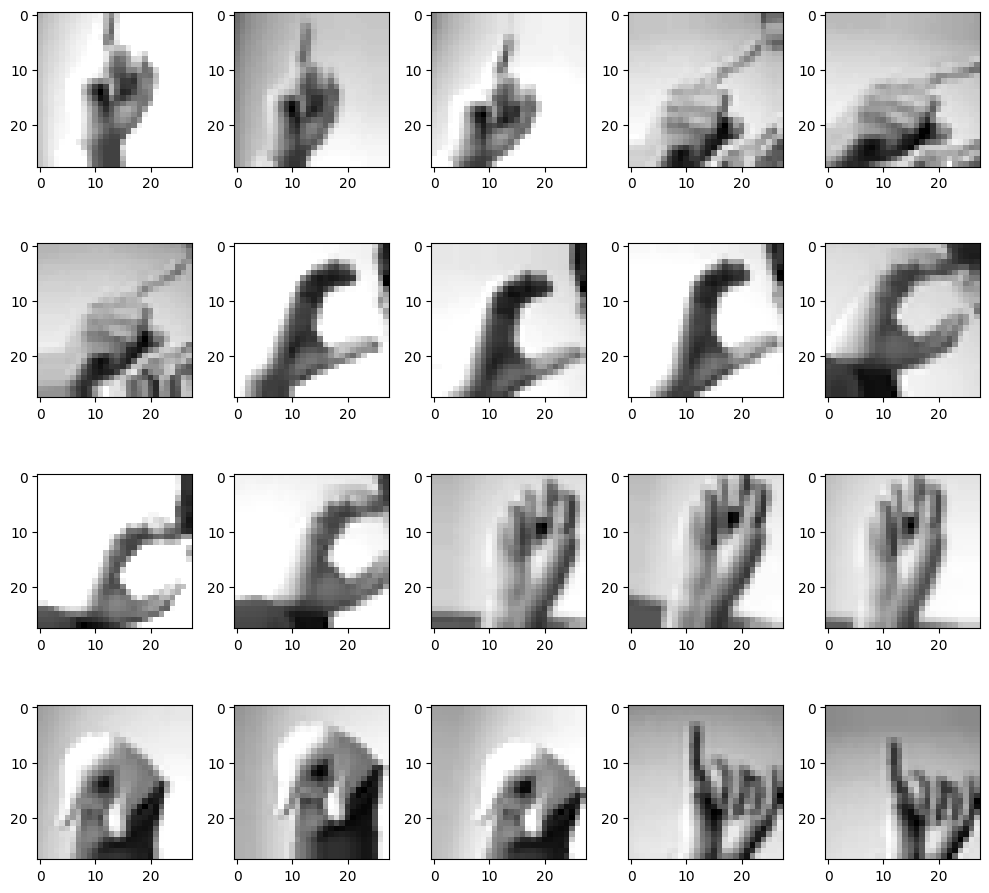

In [13]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [6]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [7]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [8]:
history = model.fit(x_train,y_train, batch_size = 128 ,epochs = 2 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction], verbose=1)


Epoch 1/2
858/858 [==============================] - 163s 189ms/step - loss: 0.4157 - accuracy: 0.8692 - val_loss: 0.2510 - val_accuracy: 0.9190 - lr: 0.0010
Epoch 2/2
858/858 [==============================] - 153s 178ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.1208 - val_accuracy: 0.9599 - lr: 0.0010


In [9]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

897/897 [==============================] - 9s 10ms/step - loss: 0.1208 - accuracy: 0.9599
Accuracy of the model is -  95.99135518074036 %


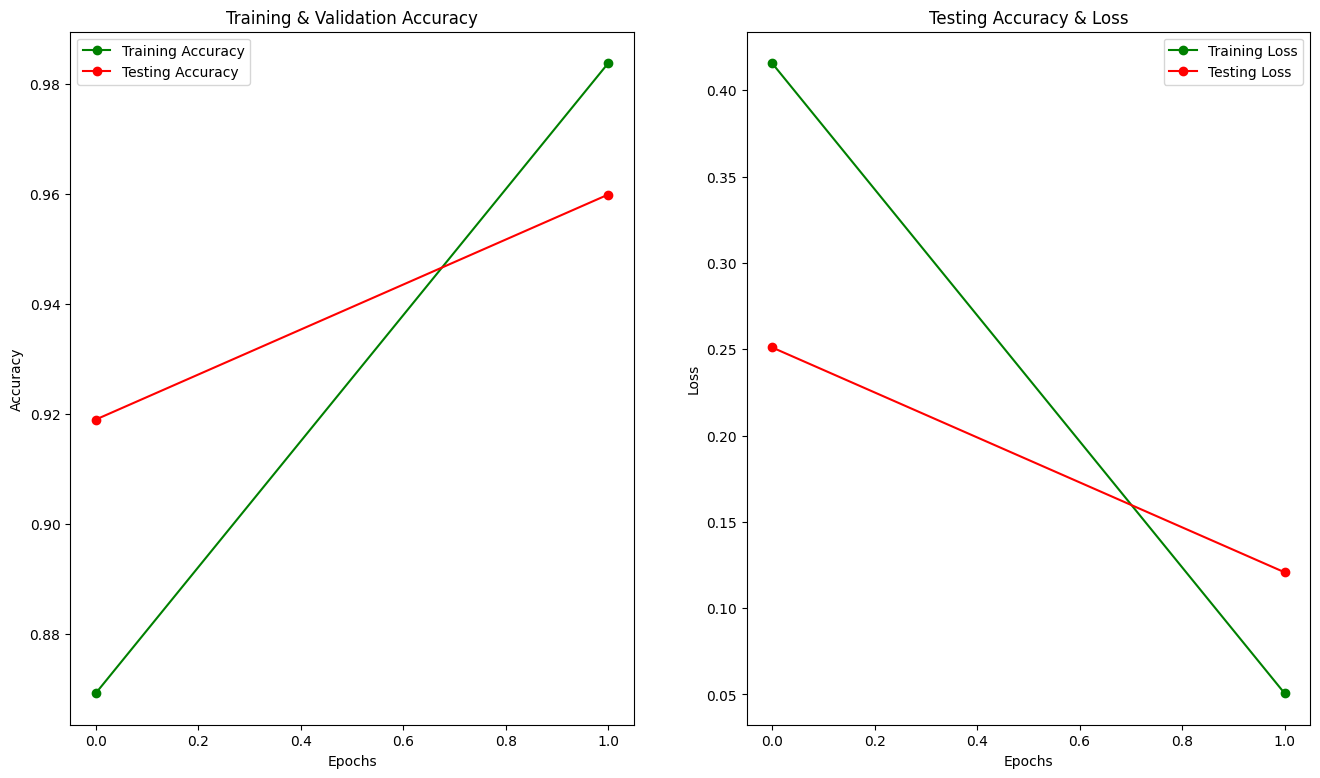

In [11]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,9)

epochs_acc = [i for i in range(len(history.history['accuracy']))]
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax[0].plot(epochs_acc, train_acc, 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs_acc, val_acc, 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

epochs_loss = [i for i in range(len(history.history['loss']))]
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1].plot(epochs_loss, train_loss, 'g-o' , label = 'Training Loss')
ax[1].plot(epochs_loss, val_loss, 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()
